In [1]:
import gym
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
position = ctrl.Antecedent(np.linspace(-1.2, 0.6, 10000), 'position') # 10000 points between -1.2 to 0.6 inclusive
speed = ctrl.Antecedent(np.linspace(-0.07, 0.07, 10000), 'speed') # 10000 points between -0.07 to +0.07 inclusive
force = ctrl.Consequent(np.linspace(-1, 1, 10000), 'force') # 10000 points between -1 to 1 inclusive

c:\Users\erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


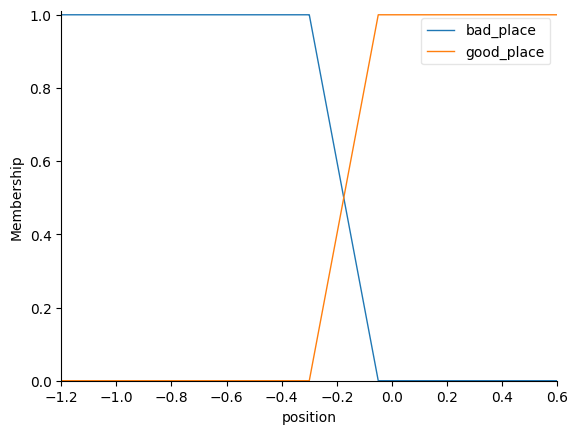

In [3]:
position['bad_place'] = fuzz.trapmf(position.universe, [-1.2, -1.2, -0.3, -0.05]) # trapezoidal membership
position['good_place'] = fuzz.trapmf(position.universe, [-0.3, -0.05, 0.6, 0.6]) # trapezoidal membership

position.view()

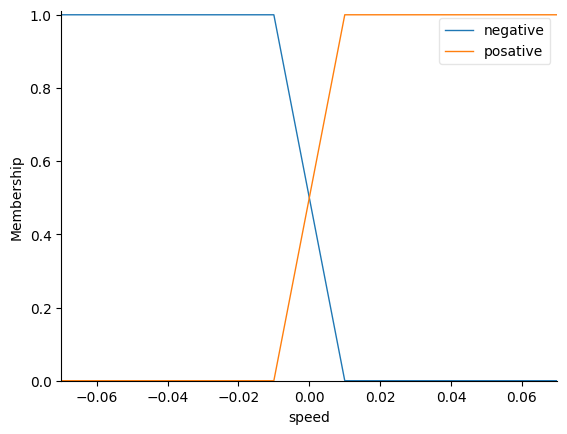

In [4]:
speed['negative'] = fuzz.trapmf(speed.universe, [-0.07, -0.07, -0.01, 0.01]) # trapezoidal membership
speed['posative'] = fuzz.trapmf(speed.universe, [-0.01, 0.01, 0.07, 0.07]) # trapezoidal membership

speed.view()

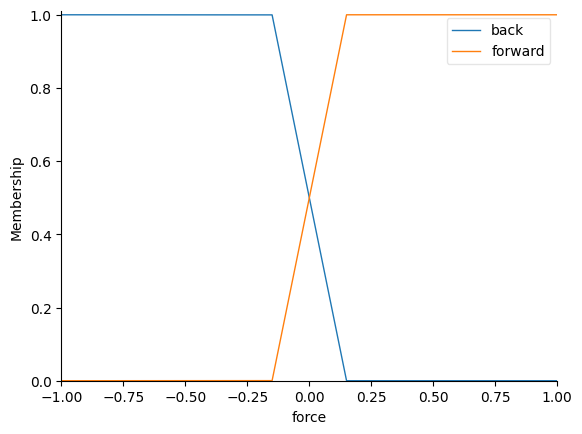

In [5]:
force['back'] = fuzz.trapmf(force.universe, [-1, -1, -0.15, 0.15]) # trapezoidal membership
force['forward'] = fuzz.trapmf(force.universe, [-0.15, 0.15, 1, 1]) # trapezoidal membership

force.view()

In [6]:
list_rules = []
list_rules.append(ctrl.Rule(position['bad_place'] & speed['negative'], force['back']))
list_rules.append(ctrl.Rule(position['bad_place'] & speed['posative'], force['forward']))
list_rules.append(ctrl.Rule(position['good_place'] & speed['negative'], force['back']))
list_rules.append(ctrl.Rule(position['good_place']& speed['posative'], force['forward']))

fuzzy_ctrl = ctrl.ControlSystem(list_rules)
car = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [7]:
rewards = []
frames = []   
env = gym.make("MountainCarContinuous-v0")
env.seed(101)
np.random.seed(101)
    
last_position,last_speed = env.reset()
frames.append(env.render('rgb_array'))
step = 0
while step < 500:
        
    step += 1
    car.input['position'] = last_position
    car.input['speed'] = last_speed
    car.compute()
    force_amount = np.array([car.output["force"]])
    
        
    last_position_and_last_speed, reward, ending, _ = env.step(force_amount)
    last_position = last_position_and_last_speed[0]
    last_speed = last_position_and_last_speed[1]
    frames.append(env.render('rgb_array'))
    rewards.append(reward) 
        
    if ending:
        break
env.close()
         
print(f'my step: {step}')
print(f'prove that my car reached = {last_position}')


my step: 162
prove that my car reached = 0.48718892121010887


In [8]:
#https://jfking50.github.io/mountaincar/

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, filename, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    anim.save(filename)
    plt.close()
    return anim

plot_animation(frames, 'my_car_action.gif')


MovieWriter ffmpeg unavailable; using Pillow instead.


Text(0.5, 1.0, 'Car Reward in challange')

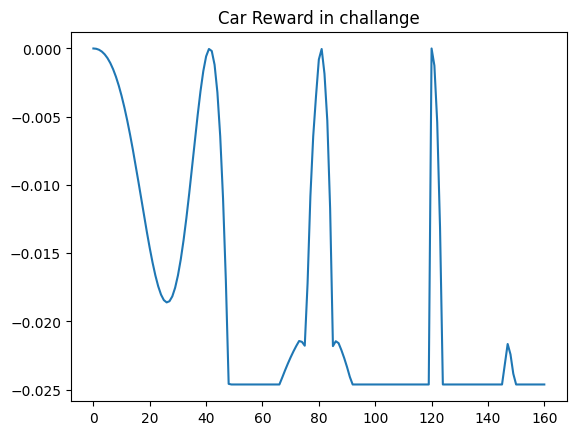

In [9]:
plt.plot(rewards[:-1])
plt.title('Car Reward in challange')